# Developing a Face Recognition System Using the Labeled Faces in the Wild (LFW) Dataset

A face recognition system using the Labeled Faces in the Wild (LFW) dataset leverages deep learning techniques to identify and verify individuals based on their facial images. The LFW dataset, containing over 13,000 labeled images of faces from 5,749 different people, provides a rich resource for training and testing facial recognition algorithms. By employing Convolutional Neural Networks (CNNs) and transfer learning from pre-trained models, this system effectively extracts and learns distinctive facial features. The process involves preprocessing the dataset, training a deep learning model, and evaluating its accuracy in recognizing and distinguishing between different faces. This project demonstrates practical applications in areas such as security, identity verification, and personalized user experiences.

##  Load and Explore the Dataset

In [19]:
from sklearn.datasets import fetch_lfw_people

In [20]:
import matplotlib.pyplot as plt

In [21]:
import numpy as np

Number of samples: 1288
Image dimensions: 50x37


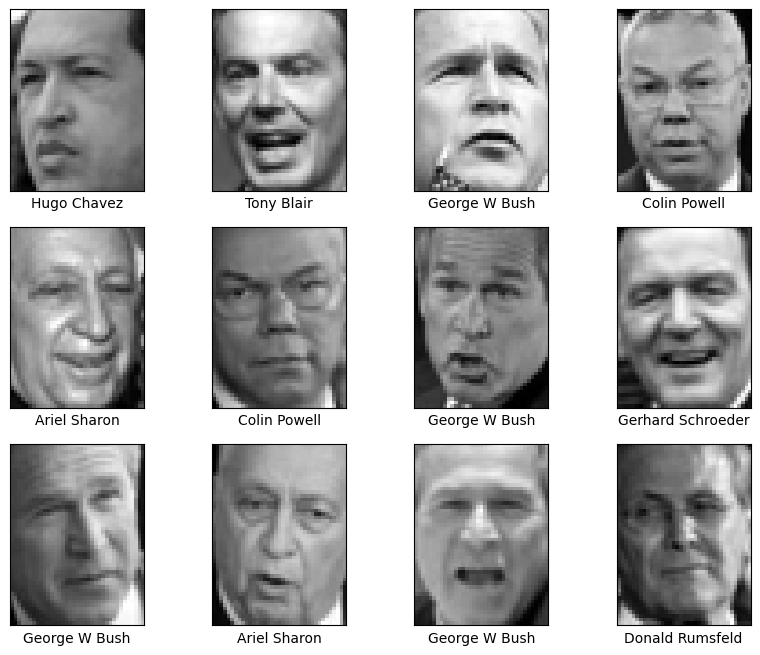

In [22]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape

print(f"Number of samples: {n_samples}")
print(f"Image dimensions: {h}x{w}")

# Display some sample images
fig, ax = plt.subplots(3, 4, figsize=(10, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(lfw_people.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[lfw_people.target[i]])
plt.show()


##  Preprocess the Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = lfw_people.images
y = lfw_people.target

X = X[..., np.newaxis]  # Add channel dimension for grayscale images
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))


##  Build and Compile the CNN Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(h, w, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(lfw_people.target_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,775 (878.03 KB)

 Trainable params: 224,775 (878.03 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [25]:
history = model.fit(X_train, y_train_enc, epochs=20, batch_size=32, validation_data=(X_test, y_test_enc))

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3839 - loss: 1.7832 - val_accuracy: 0.4612 - val_loss: 1.6302
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4044 - loss: 1.7161 - val_accuracy: 0.4612 - val_loss: 1.5996
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3952 - loss: 1.7448 - val_accuracy: 0.4612 - val_loss: 1.5908
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3901 - loss: 1.7062 - val_accuracy: 0.4612 - val_loss: 1.5483
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4044 - loss: 1.6656 - val_accuracy: 0.5194 - val_loss: 1.5710
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4611 - loss: 1.5678 - val_accuracy: 0.5620 - val_loss: 1.3018
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5053 - loss: 1.3673 - val_accuracy: 0.6318 - val_loss: 1.0910
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5847 - loss: 1.1713 - val_accuracy: 0.7132 - v

In [ ]:
## 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8835 - loss: 0.4699
Test accuracy: 0.88


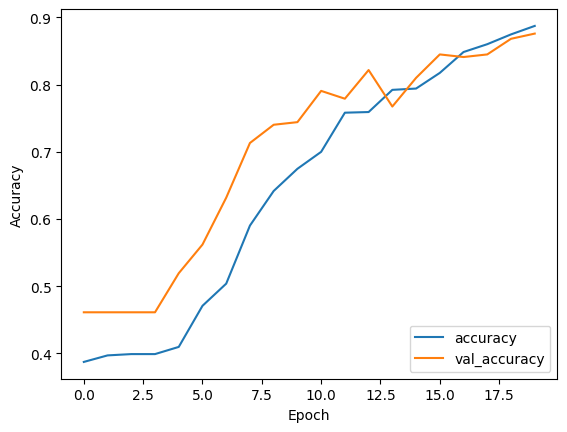

In [26]:
import numpy as np

loss, accuracy = model.evaluate(X_test, y_test_enc)
print(f"Test accuracy: {accuracy:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(h, w, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(lfw_people.target_names), activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert grayscale to RGB by repeating the channels
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

history_tl = transfer_model.fit(X_train_rgb, y_train_enc, epochs=20, batch_size=32, validation_data=(X_test_rgb, y_test_enc))


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.2945 - loss: 1.9868 - val_accuracy: 0.5659 - val_loss: 1.3916
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.5060 - loss: 1.4671 - val_accuracy: 0.6395 - val_loss: 1.2403
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.5779 - loss: 1.2844 - val_accuracy: 0.6357 - val_loss: 1.1361
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.6026 - loss: 1.1987 - val_accuracy: 0.6589 - val_loss: 1.0555
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.6150 - loss: 1.1528 - val_accuracy: 0.7016 - val_loss: 1.0042
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.6399 - loss: 1.0529 - val_accuracy: 0.6977 - val_loss: 0.9406
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.6680 - loss: 1.0107 - val_accuracy: 0.7248 - val_loss: 0.9080
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.6732 - loss: 0.9830 - val_accuracy: 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.7873 - loss: 0.6882
Test accuracy with transfer learning: 0.79


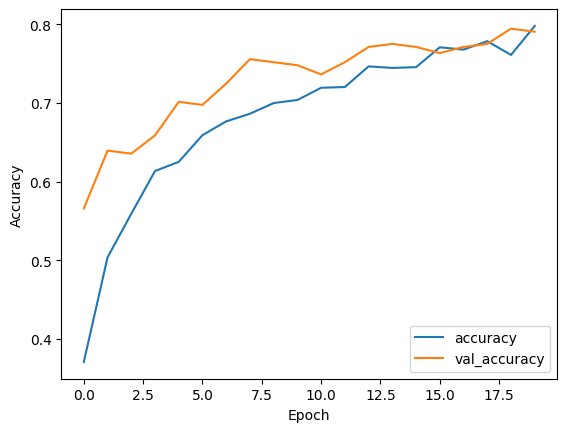

In [28]:
loss_tl, accuracy_tl = transfer_model.evaluate(X_test_rgb, y_test_enc)
print(f"Test accuracy with transfer learning: {accuracy_tl:.2f}")

# Plot training history
plt.plot(history_tl.history['accuracy'], label='accuracy')
plt.plot(history_tl.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


## Conclusion

 This project will help you understand CNNs, face recognition, and transfer learning, building a robust face recognition system using the LFW dataset. Experimenting with different architectures and hyperparameters can further improve the model's performance.